<a href="https://colab.research.google.com/github/bradneve/first_machine_learning-_model_final_project/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json
import csv
import pandas as pd
from numpy import nan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [29]:
name_response = requests.get("https://fantasy.premierleague.com/api/bootstrap-static/")
names = name_response.json()["elements"]
teams = name_response.json()["teams"]

In [293]:
games_data = []
for i in range(1, len(names)):
  for name in names:
    if name["id"] == i:
      bootstrap_player_data = name
      break
  response = requests.get(f"https://fantasy.premierleague.com/api/element-summary/{i}/")
  player_games_data = response.json()
  prev_game = {"influence":0, "summed_influence":0, "creativity":0, "summed_creativity":0, "threat":0, "summed_threat":0,"summed_ict": 0, "ict_index": 0, "minutes": 0, "total_mins": 0, "total_goals": 0, "goals_scored": 0, "goals_conceded": 0, "total_goals_conceded": 0, "total_assists": 0, "assists": 0}
  for x in player_games_data["history"]:
    x["position"] = bootstrap_player_data["element_type"]
    x["id"] = bootstrap_player_data["id"]
    x["value"] = float(x["value"])
    x["next_opponent"] = player_games_data["fixtures"][0]["difficulty"]
    x["opponent_team"] = int(x["opponent_team"])
    x["opponent_team_strength"] = float(teams[x["opponent_team"]-1]["strength"])
    x["gameweek"] = float(x["round"])
    x["influence"] = float(x["influence"])
    x["creativity"] = float(x["creativity"])
    x["threat"] = float(x["threat"])
    x["summed_influence"] = prev_game["summed_influence"] + prev_game["influence"]
    x["summed_creativity"] = prev_game["summed_creativity"] + prev_game["creativity"]
    x["summed_threat"] = prev_game["summed_threat"] + prev_game["threat"]
    x["ict_index"] = float(x["ict_index"])
    x["minutes"] = float(x["minutes"])
    x["summed_ict"] = prev_game["summed_ict"] + prev_game["ict_index"]
    x["total_mins"] = prev_game["minutes"] + prev_game["total_mins"]
    x["total_goals"] = prev_game["goals_scored"] + prev_game["total_goals"]
    x["total_goals_conceded"] = prev_game["goals_conceded"] + prev_game["total_goals_conceded"]
    x["total_assists"] = prev_game["assists"] + prev_game["total_assists"]

    if x["minutes"] == 0 and prev_game["total_mins"] == 0:
      x["average_influence_per_90"] = round(prev_game["summed_influence"], 1)
      x["average_creativity_per_90"] = round(prev_game["summed_creativity"], 1)
      x["average_threat_per_90"] = round(prev_game["summed_threat"], 1)
      x["average_ict_per_90"] = round(prev_game["summed_ict"], 1)
      x["average_goals_per_90"] = round(prev_game["total_goals"], 1)
      x["average_goals_conceded_per_90"] = round(prev_game["total_goals_conceded"], 1)
      x["average_assists_per_90"] = round(prev_game["total_assists"], 1)
      x["average_mins"] = (prev_game["minutes"] + prev_game["total_mins"])/(player_games_data["history"].index(x)+1)
      games_data.append(x)
      prev_game = x

    elif prev_game["total_mins"] == 0 :
      x["average_influence_per_90"] = round(90*prev_game["influence"]/x["minutes"], 1)
      x["average_creativity_per_90"] = round(90*prev_game["creativity"]/x["minutes"], 1)
      x["average_threat_per_90"] = round(90*prev_game["threat"]/x["minutes"], 1)
      x["average_ict_per_90"] = round(90*prev_game["ict_index"]/x["minutes"], 1)
      x["average_goals_per_90"] = round(90*prev_game["goals_scored"]/x["minutes"], 1)
      x["average_goals_conceded_per_90"] = round(90*prev_game["goals_conceded"]/x["minutes"], 1)
      x["average_assists_per_90"] = round(90*prev_game["assists"]/x["minutes"], 1)
      x["average_mins"] = (prev_game["minutes"] + prev_game["total_mins"])/(player_games_data["history"].index(x)+1)
      games_data.append(x)
      prev_game = x

    else:
      x["average_influence_per_90"] = round(90*prev_game["summed_influence"]/prev_game["total_mins"], 1)
      x["average_creativity_per_90"] = round(90*prev_game["summed_creativity"]/prev_game["total_mins"], 1)
      x["average_threat_per_90"] = round(90*prev_game["summed_threat"]/prev_game["total_mins"], 1)
      x["average_ict_per_90"] = round(90*prev_game["summed_ict"]/prev_game["total_mins"], 1)
      x["average_goals_per_90"] = round(90*prev_game["total_goals"]/prev_game["total_mins"], 1)
      x["average_goals_conceded_per_90"] = round(90*prev_game["total_goals_conceded"]/prev_game["total_mins"], 1)
      x["average_assists_per_90"] = round(90*prev_game["total_assists"]/prev_game["total_mins"], 1)
      x["average_mins"] = (prev_game["minutes"] + prev_game["total_mins"])/(player_games_data["history"].index(x))
      games_data.append(x)
      prev_game = x

In [4]:
# def select_data(player):
#     return {
#         "id": player["id"],
#         "gameweek": player["gameweek"],
#         "total_points": player["total_points"],
#         "position": player["position"],
#         "was_home": player["was_home"],
#         "opponent_team": player["opponent_team"],
#         "average_goals_per_90": player["average_goals_per_90"],
#         "average_assists_per_90": player["average_assists_per_90"],
#         "average_ict_per_90": player["average_ict_per_90"],
#         "average_goals_conceded_per_90": player["average_goals_conceded_per_90"],
#         "average_influence_per_90": player["average_influence_per_90"],
#         "average_creativity_per_90": player["average_creativity_per_90"],
#         "average_threat_per_90": player["average_threat_per_90"],
#         "value": player["value"]
#     }

# for i in range(len(games_data)):
#   games_data[i] = select_data(games_data[i])

In [295]:
headers = ['id', 'gameweek', 'total_points', "position", 'was_home', 'opponent_team_strength', 'average_goals_per_90', "average_assists_per_90", "average_ict_per_90", "average_goals_conceded_per_90", "value", "average_influence_per_90", "average_creativity_per_90", "average_threat_per_90", "average_mins", "minutes"]

with open("player_data.csv", "w", newline='') as file:
    f = csv.writer(file)
    f.writerow(headers)
    for p in games_data:
        values = [p[h] for h in headers]
        f.writerow(values)

In [296]:
player_data = pd.read_csv('player_data.csv')

In [324]:
player_data = player_data.drop(player_data[player_data["total_points"] > 17].index)
player_data = player_data.drop(player_data[(player_data["total_points"] > 13) & (player_data["position"] == 1)].index)
player_data = player_data.drop(player_data[(player_data["total_points"] > 14) & (player_data["position"] == 2)].index)

In [349]:
y = player_data["total_points"]
X = player_data[['position', 'opponent_team_strength', 'was_home', 'average_goals_per_90',
       'average_assists_per_90', 'average_ict_per_90', 'average_goals_conceded_per_90', 'value', 'average_influence_per_90',
                'average_creativity_per_90', 'average_threat_per_90', 'average_mins', 'minutes']]


In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=300)

In [351]:
model = DecisionTreeClassifier(max_depth = 50)

In [352]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50)

In [353]:
model.score(X_test, y_test)

0.731457800511509

In [354]:
model.predict(X_test).sum()/len(model.predict(X_test))

1.4373401534526855

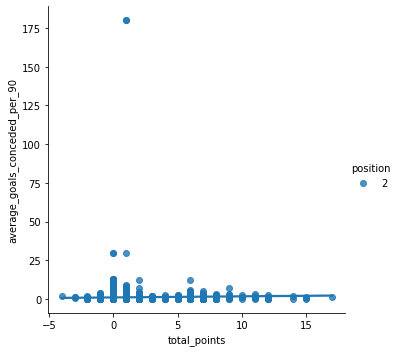

In [304]:
sns.lmplot(data=player_data[player_data["position"] == 2], x="total_points", y="average_goals_conceded_per_90", hue="position")

In [402]:
most_recent_gameweek_stats = [player for player in games_data if player["gameweek"] == 14 ]
data_to_predict_from = []


for player in most_recent_gameweek_stats:
  player_stats_to_predict_from = {}
  player_stats_to_predict_from["id"] = float(player["id"])
  player_stats_to_predict_from["value"] = float(player["value"])
  player_stats_to_predict_from["position"] = float(player["position"])
  player_stats_to_predict_from["was_home"] = player["was_home"]
  player_stats_to_predict_from["minutes"] = round(player["average_mins"])
  player_stats_to_predict_from["opponent_team_strength"] = player["next_opponent"]
  if player["total_mins"] == 0:
    player_stats_to_predict_from["average_creativity_per_90"] = 0 
    player_stats_to_predict_from["average_influence_per_90"] = 0 
    player_stats_to_predict_from["average_threat_per_90"] = 0 
    player_stats_to_predict_from["average_ict_per_90"] = 0
    player_stats_to_predict_from["average_goals_per_90"] = 0 
    player_stats_to_predict_from["average_goals_conceded_per_90"] = 0
    player_stats_to_predict_from["average_assists_per_90"] = 0 
    player_stats_to_predict_from["average_mins"] = 0 
    data_to_predict_from.append(player_stats_to_predict_from)
  else:
    player_stats_to_predict_from["average_creativity_per_90"] = 90*player["summed_creativity"]/player["total_mins"]
    player_stats_to_predict_from["average_influence_per_90"] = 90*player["summed_influence"]/player["total_mins"]
    player_stats_to_predict_from["average_threat_per_90"] = 90*player["summed_threat"]/player["total_mins"]
    player_stats_to_predict_from["average_ict_per_90"] = 90*player["summed_ict"]/player["total_mins"]
    player_stats_to_predict_from["average_goals_per_90"] = 90*player["total_goals"]/player["total_mins"]
    player_stats_to_predict_from["average_goals_conceded_per_90"] = 90*player["total_goals_conceded"]/player["total_mins"]
    player_stats_to_predict_from["average_assists_per_90"] = 90*player["total_assists"]/player["total_mins"]
    player_stats_to_predict_from["average_mins"] = player["average_mins"]
    data_to_predict_from.append(player_stats_to_predict_from)

In [356]:
headers = ['position', 'opponent_team_strength', 'was_home', 'average_goals_per_90',
       'average_assists_per_90', 'average_ict_per_90', 'average_goals_conceded_per_90', 'value', 'average_influence_per_90',
                'average_creativity_per_90', 'average_threat_per_90', 'average_mins', 'minutes']

with open("data_to_predict_from_csv.csv", "w", newline='') as file:
    f = csv.writer(file)
    f.writerow(headers)
    for p in data_to_predict_from:
        values = [p[h] for h in headers]
        f.writerow(values)

In [357]:
data_to_predict_from_csv = pd.read_csv('data_to_predict_from_csv.csv')

In [401]:
predicted_scores = model.predict(data_to_predict_from_csv)

In [382]:
result = np.where( predicted_scores == 13)
print(result)
print(data_to_predict_from[317])

(array([317, 513]),)
{'id': 318.0, 'value': 122.0, 'position': 4.0, 'was_home': False, 'minutes': 84, 'opponent_team_strength': 2, 'average_creativity_per_90': 13.930434782608696, 'average_influence_per_90': 62.68695652173914, 'average_threat_per_90': 82.17391304347827, 'average_ict_per_90': 15.88695652173913, 'average_goals_per_90': 1.6630434782608696, 'average_goals_conceded_per_90': 1.076086956521739, 'average_assists_per_90': 0.29347826086956524, 'average_mins': 83.63636363636364}


# Trying to predict One player

In [310]:
predicted_scores.sum()/len(predicted_scores)

1.233587786259542

In [ ]:
player_data[player_data["id"] == 514]

In [412]:
data = {"predictions_with_names" : []}

for i in range(654):
    player = {}
    player["id"] = i + 1
    player["predicted_points"] =  predicted_scores[i]
    data["predictions_with_names"].append(player)


In [417]:
r = requests.post("http://127.0.0.1:5000/predictions", data=data, headers={"Content-Type": "application/json"})


ConnectionError: ignored

Average ict skewing results for low minute players

In [312]:
model.tree_.max_depth

31